In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances_argmin
%matplotlib inline

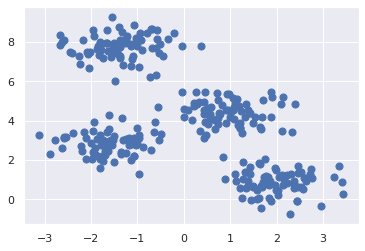

In [2]:
X, y_true = make_blobs(n_samples = 300, centers = 4,
                      cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.show()

In [3]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans  = kmeans.predict(X)

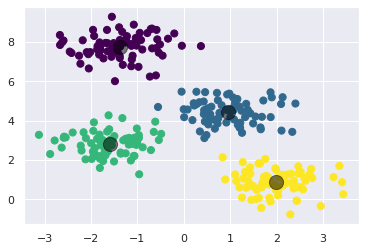

In [4]:
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5)
plt.show()

In [5]:
def find_cluster(X, n_clusters, rseed = 2):
    #1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on cluster center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new clusters from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if  np.all(centers == new_centers):
            break
        centers = new_centers
        
    return centers, labels

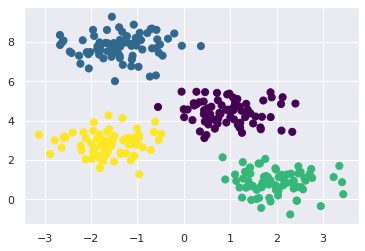

In [6]:
centers, labels = find_cluster(X, 4)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')

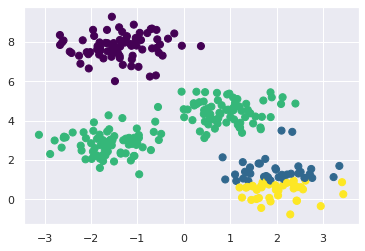

In [7]:
centers, labels = find_cluster(X, 4, rseed = 0)
plt.scatter(X[:, 0], X[:, 1], c = labels,s = 50,
           cmap = 'viridis')

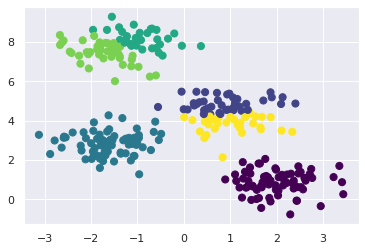

In [8]:
labels = KMeans(6, random_state = 0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c = labels, s = 50, cmap = 'viridis')
plt.show()

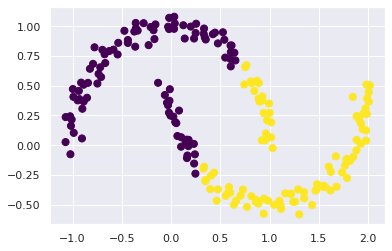

In [9]:
X, y = make_moons(200, noise = 0.05, random_state = 0)
labels = KMeans(2, random_state =0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s = 50, c = labels, cmap = plt.cm.viridis)
plt.show()

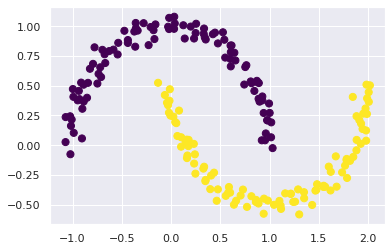

In [10]:
model =SpectralClustering(n_clusters=2,
                         affinity='nearest_neighbors',
                         assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], s = 50, c = labels, 
           cmap = plt.cm.viridis)
plt.show()